In [1]:
import pandas as pd
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tickers = pd.read_csv("../data/nasdaq_comps_2016-2020.csv")

In [3]:
tickers = list(set(tickers['2019']).intersection(set(tickers['2018'])))
etf = 'QQQ'
start = '2018-01-01'
end = '2018-12-31'
cointegrationResultsIndividual = fn.runCointTestIndividual(etf, tickers, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed
ROST
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
FB
[*********************100%***********************]  1 of 1 completed
ALGN
[*********************100%***********************]  1 of 1 completed
KLAC
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
LBTYA
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CTRP: No data found, symbol may be delisted
err
[*********************100%***********************]  1 of 1 completed
SNPS
[*********************100%***********************]  1 of 1 completed
ATVI
[*********************100%***********************]  1

In [4]:
cointegrationResultsIndividual.head()

,ticker,t-stat,pval
71,HAS,-3.476138,0.034570
61,AAPL,-3.268703,0.059170
56,TTWO,-3.186715,0.072178
31,IDXX,-3.156778,0.077458
50,SBUX,-3.125705,0.083256


In [5]:
subset = cointegrationResultsIndividual.loc[cointegrationResultsIndividual['pval'] <= 0.2]
tickers = subset['ticker'].tolist()
etf = 'QQQ'
start = '2018-01-01'
end = '2018-12-31'
synthetic_asset_rank = fn.runCointTestBasketsJoh(etf, tickers, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed
0 done, out of a total of  1013
500 done, out of a total of  1013
1000 done, out of a total of  1013


In [6]:
synthetic_asset_rank.head()

,ticker,critical-values,trace-stat
697,"[HAS, TTWO, IDXX, SBUX, CTAS, ALXN]","[2.7055, 3.8415, 6.6349]",0.045069
446,"[HAS, TTWO, SBUX, CTAS, ALXN]","[2.7055, 3.8415, 6.6349]",0.049130
895,"[HAS, TTWO, IDXX, SBUX, CTAS, ALXN, PAYX]","[2.7055, 3.8415, 6.6349]",0.072650
719,"[HAS, TTWO, SBUX, CTAS, ALXN, PAYX]","[2.7055, 3.8415, 6.6349]",0.078982
432,"[HAS, TTWO, IDXX, SBUX, ALXN]","[2.7055, 3.8415, 6.6349]",0.087837


In [7]:
# Start from 01-01-2019 and end at 12-31-2019
qqq = pd.read_csv("../data/qqqMinute2019.csv")
has = pd.read_csv("../data/hasMinute2019.csv")
ttwo = pd.read_csv("../data/ttwoMinute2019.csv")
idxx = pd.read_csv("../data/idxxMinute2019.csv")
sbux = pd.read_csv("../data/sbuxMinute2019.csv")
ctas = pd.read_csv("../data/ctasMinute2019.csv")
alxn = pd.read_csv("../data/alxnMinute2019.csv")

In [8]:
qqq = qqq.set_index('date_time')
qqq = qqq.rename(columns={'close': 'qqqclose'})

has = has.set_index('date_time')
has = has.rename(columns={'close': 'hasclose'})

ttwo = ttwo.set_index('date_time')
ttwo = ttwo.rename(columns={'close': 'ttwoclose'})

idxx = idxx.set_index('date_time')
idxx = idxx.rename(columns={'close': 'idxxclose'})

sbux = sbux.set_index('date_time')
sbux = sbux.rename(columns={'close': 'sbuxclose'})

ctas = ctas.set_index('date_time')
ctas = ctas.rename(columns={'close': 'ctasclose'})

alxn = alxn.set_index('date_time')
alxn = alxn.rename(columns={'close': 'alxnclose'})

data = qqq[['qqqclose']].join([has[['hasclose']], ttwo[['ttwoclose']], idxx[['idxxclose']], 
                               sbux[['sbuxclose']], ctas[['ctasclose']], alxn[['alxnclose']]], how='outer')
data = data.dropna()
data.tail(20)

,qqqclose,hasclose,ttwoclose,idxxclose,sbuxclose,ctasclose,alxnclose
2019-12-31 15:30:00,212.345,105.7300,122.2000,260.78,87.6850,268.2800,108.0100
2019-12-31 15:31:00,212.330,105.7100,122.1600,260.86,87.7050,268.3100,107.9500
2019-12-31 15:32:00,212.355,105.6972,122.1200,260.94,87.7130,268.3200,107.9500
2019-12-31 15:33:00,212.360,105.6900,122.1800,260.85,87.7250,268.4400,107.9550
2019-12-31 15:34:00,212.365,105.6900,122.2200,260.91,87.7700,268.4900,107.9700
2019-12-31 15:35:00,212.385,105.6800,122.1800,260.89,87.7650,268.4800,107.9850
2019-12-31 15:36:00,212.370,105.6500,122.2000,260.92,87.7600,268.4793,108.0387
2019-12-31 15:37:00,212.350,105.6200,122.1700,260.73,87.7600,268.4900,107.9800
2019-12-31 15:38:00,212.385,105.6200,122.1298,260.51,87.7600,268.5600,108.0000
2019-12-31 15:39:00,212.355,105.6044,122.1050,260.52,87.7500,268.5800,108.0300


In [9]:
syntheticAssetLogPrice = data[['hasclose', 'ttwoclose', 'idxxclose', 'sbuxclose', 'ctasclose', 'alxnclose']].apply(np.log)
qqqLogPrice = np.log(data['qqqclose'].values)

In [10]:
kf = fn.multivariateKalmanFilter(syntheticAssetLogPrice, qqqLogPrice)
state_means, state_covs = kf.filter(qqqLogPrice)
basket_size = len(syntheticAssetLogPrice.columns)
slopes = state_means[:, np.arange(0, basket_size, 1)]
intercept = state_means[:, basket_size]

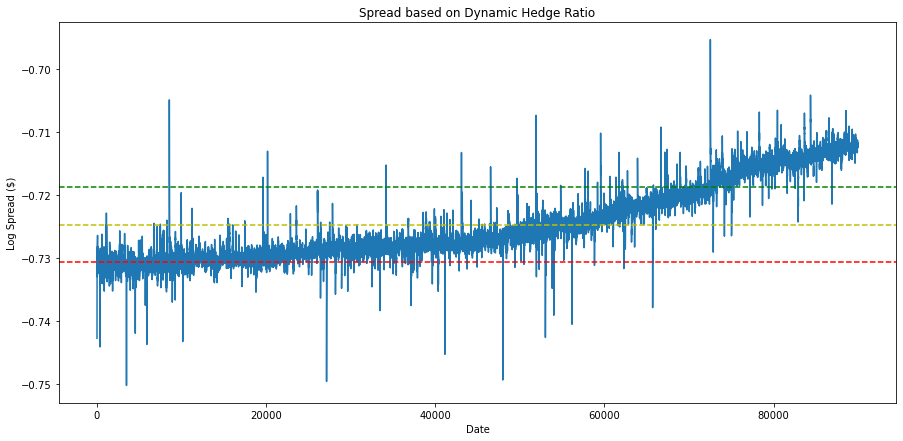

In [11]:
syntheticAssetEstimate = [np.dot(slopes[i], syntheticAssetLogPrice.values[i].T) for i in range(len(slopes))]
spread_ts = qqqLogPrice - syntheticAssetEstimate
plt.figure(figsize = (15,7))
plt.plot(spread_ts)
plt.title("Spread based on Dynamic Hedge Ratio")
plt.ylabel("Log Spread ($)")
plt.xlabel("Date")
spread_avg = spread_ts.mean()
spread_sd = spread_ts.std()
upper_threshold = spread_avg + spread_sd
lower_threshold = spread_avg - spread_sd
plt.axhline(upper_threshold, linestyle = 'dashed', color = 'g')
plt.axhline(spread_avg, linestyle = 'dashed', color = 'y')
plt.axhline(lower_threshold, linestyle = 'dashed', color = 'r')

In [12]:
# Start from 01-01-2018 and end at 12-31-2018
qqq2018 = pd.read_csv("../data/qqqMinute2018.csv")
has2018 = pd.read_csv("../data/hasMinute2018.csv")
ttwo2018 = pd.read_csv("../data/ttwoMinute2018.csv")
idxx2018 = pd.read_csv("../data/idxxMinute2018.csv")
sbux2018 = pd.read_csv("../data/sbuxMinute2018.csv")
ctas2018 = pd.read_csv("../data/ctasMinute2018.csv")
alxn2018 = pd.read_csv("../data/alxnMinute2018.csv")

In [13]:
qqq2018 = qqq2018.set_index('date_time')
qqq2018 = qqq2018.rename(columns={'close': 'qqqclose'})

has2018 = has2018.set_index('date_time')
has2018 = has2018.rename(columns={'close': 'hasclose'})

ttwo2018 = ttwo2018.set_index('date_time')
ttwo2018 = ttwo2018.rename(columns={'close': 'ttwoclose'})

idxx2018 = idxx2018.set_index('date_time')
idxx2018 = idxx2018.rename(columns={'close': 'idxxclose'})

sbux2018 = sbux2018.set_index('date_time')
sbux2018 = sbux2018.rename(columns={'close': 'sbuxclose'})

ctas2018 = ctas2018.set_index('date_time')
ctas2018 = ctas2018.rename(columns={'close': 'ctasclose'})

alxn2018 = alxn2018.set_index('date_time')
alxn2018 = alxn2018.rename(columns={'close': 'alxnclose'})

data2018 = qqq2018[['qqqclose']].join([has2018[['hasclose']], ttwo2018[['ttwoclose']], idxx2018[['idxxclose']], 
                                       sbux2018[['sbuxclose']], ctas2018[['ctasclose']], alxn2018[['alxnclose']]], 
                                      how='outer')
data2018 = data2018.dropna()

In [14]:
lookback_list = np.arange(30, 301, 15)
z_thresh_list = np.arange(1, 2.6, .1)
results_map = fn.tuneBBParameters(data2018, lookback_list, z_thresh_list, 
                                  ['hasclose', 'ttwoclose', 'idxxclose', 'sbuxclose', 'ctasclose', 'alxnclose'], 
                                 stoploss = None)

C:\Users\liuvi\Documents\fall2020\f20_stat_arb\functions.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['logspread'] = spread_ts
C:\Users\liuvi\Documents\fall2020\f20_stat_arb\functions.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['spread'] = np.exp(spread_ts)
C:\Users\liuvi\Documents\fall2020\f20_stat_arb\functions.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


10 done, out of 304
20 done, out of 304
30 done, out of 304
40 done, out of 304
50 done, out of 304
60 done, out of 304
70 done, out of 304
80 done, out of 304
90 done, out of 304
100 done, out of 304
110 done, out of 304
120 done, out of 304
130 done, out of 304
140 done, out of 304
150 done, out of 304
160 done, out of 304
170 done, out of 304
180 done, out of 304
190 done, out of 304
200 done, out of 304
210 done, out of 304
220 done, out of 304
230 done, out of 304
240 done, out of 304
250 done, out of 304
260 done, out of 304
270 done, out of 304
280 done, out of 304
290 done, out of 304
300 done, out of 304
304 done, out of 304


In [15]:
list(results_map.items())[:10]

[((75, 1.0), [28233.706100000432, 1.0883178234374848, 1.590219988220545]),
 ((75, 1.1), [26805.651300000438, 1.0848985715377286, 1.540128761533792]),
 ((60, 1.0), [25012.211200001024, 1.075274661784291, 1.336055357397509]),
 ((60, 1.1), [24961.556900001055, 1.075329590502077, 1.3387864659636368]),
 ((90, 1.1), [20531.69180000023, 1.0639975902103647, 1.2114929084429285]),
 ((195, 1.0), [20410.88770000053, 1.0663977444109187, 1.7654457340037921]),
 ((90, 1.0), [19818.955200000622, 1.0604834288896832, 1.1356535467557716]),
 ((105, 1.0), [19323.560500000607, 1.0594369717362457, 1.1424834349892625]),
 ((180, 1.0), [19031.050000000763, 1.0597525574779236, 1.3556990625209804]),
 ((165, 1.0), [17454.588800000605, 1.0542652843781104, 1.2270203900698036])]

In [16]:
params = list(results_map.keys())[0]
print(params)

(75, 1.0)


In [17]:
data.reset_index(inplace=True)
data['logspread'] = spread_ts
data['spread'] = np.exp(spread_ts)
data = data.rename(columns={'index': 'datetime'})

In [18]:
backtest_data = data[['datetime', 'qqqclose', 'hasclose', 'ttwoclose', 'idxxclose', 
                      'sbuxclose', 'ctasclose', 'alxnclose', 'spread']]
lookback = params[0]
z_thresh = params[1].round(2)

In [19]:
backtest_data = fn.createBands(backtest_data, lookback, z_thresh)

Text(0.5, 0, 'Date')

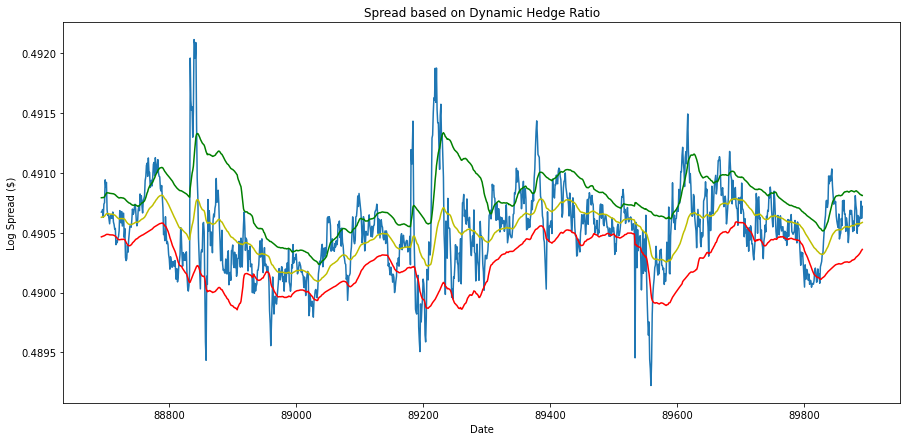

In [20]:
plt.figure(figsize = (15,7))
plt.plot(backtest_data['spread'].iloc[-1200:])
plt.plot(backtest_data['upperband'].iloc[-1200:], color='g')
plt.plot(backtest_data['ema'].iloc[-1200:], color='y')
plt.plot(backtest_data['lowerband'].iloc[-1200:], color='r')
plt.title("Spread based on Dynamic Hedge Ratio")
plt.ylabel("Log Spread ($)")
plt.xlabel("Date")

In [21]:
backtest_data = fn.createPositions(backtest_data)

In [22]:
prices = backtest_data[['hasclose', 'ttwoclose', 'idxxclose', 'sbuxclose', 'ctasclose', 'alxnclose']].values
hedge_ratios = np.asarray([slopes.T[i][lookback - 1:] for i in range(len(slopes.T))]).T

In [23]:
backtest_data['hedgeRatioHAS'] = slopes[:, 0][lookback - 1:]
backtest_data['hedgeRatioTTWO'] = slopes[:, 1][lookback - 1:]
backtest_data['hedgeRatioIDXX'] = slopes[:, 2][lookback - 1:]
backtest_data['hedgeRatioSBUX'] = slopes[:, 3][lookback -1 :]
backtest_data['hedgeRatioCTAS'] = slopes[:, 4][lookback - 1:]

In [24]:
tradeLog, minuteDf = fn.constructTradeLog(backtest_data['datetime'].values, backtest_data['position'].values, 
                                backtest_data['qqqclose'].values, prices, hedge_ratios.round(3), lot_size = 1000, 
                               stoploss = -0.0006)
tradeLog.tail()

,start,end,holdingPeriod,position,positionSizeY,entryY,exitY,positionSizeX,entryX,exitX,initialPortfolioValue,trade_profit,trade_returns
3666,2019-12-31 13:31:00,2019-12-31 13:33:00,2,short,1000,211.974,211.9500,"[132.0, 170.0, 291.0, 140.0, 295.0, 158.0]","[105.61, 121.65, 260.6, 87.345, 267.035, 107.96]","[105.66, 121.74, 260.6, 87.36, 267.15, 108.02]",430490.9250,91.4050,0.000212
3667,2019-12-31 13:46:00,2019-12-31 13:53:00,7,long,1000,212.070,212.1000,"[132.0, 170.0, 291.0, 140.0, 295.0, 158.0]","[105.5626, 122.04, 260.63, 87.34, 267.39, 108.13]","[105.6191, 122.06, 260.61, 87.355, 267.3371, 1...",430786.5832,25.8275,0.000060
3668,2019-12-31 14:07:00,2019-12-31 14:08:00,1,long,1000,212.120,212.0934,"[132.0, 170.0, 291.0, 140.0, 295.0, 158.0]","[105.48, 122.11, 260.56, 87.35, 267.5, 108.12]","[105.53, 122.12, 260.6, 87.34, 267.515, 108.025]",430849.4800,-34.5550,-0.000080
3669,2019-12-31 14:12:00,2019-12-31 14:37:00,25,long,1000,212.060,212.1800,"[132.0, 170.0, 291.0, 140.0, 295.0, 158.0]","[105.5517, 122.05, 260.88, 87.3901, 267.8371, ...","[105.5497, 122.36, 261.32, 87.575, 268.3702, 1...",430958.4829,-267.3265,-0.000620
3670,2019-12-31 14:51:00,2019-12-31 15:14:00,23,short,1000,212.190,212.2900,"[132.0, 170.0, 290.0, 140.0, 295.0, 158.0]","[105.5201, 122.375, 261.3948, 87.5541, 268.03,...","[105.55, 122.3, 261.02, 87.6023, 268.25, 108.17]",431095.1992,-96.8672,-0.000225


<ipython-input-25-4913ea6083e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_df['cumulative_returns'] = np.cumprod(1 + minuteDf['returns'])


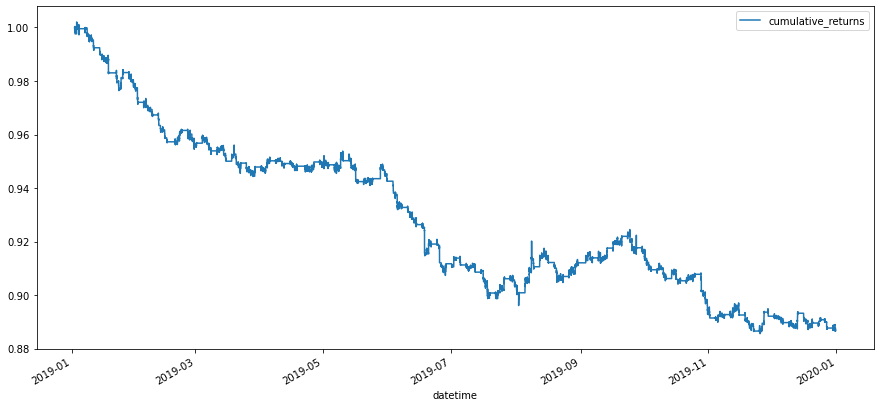

In [25]:
returns_df = minuteDf[['datetime']]
returns_df['cumulative_returns'] = np.cumprod(1 + minuteDf['returns'])
returns_df = returns_df.set_index('datetime')
returns_df.plot(figsize=[15, 7])

In [26]:
total_profit = np.cumsum(tradeLog['trade_profit'])
print('Trade Log cumulative profit was {:.3f}'.format(total_profit.iloc[-1]))

Trade Log cumulative profit was -44703.414


In [27]:
cumulative_return = np.cumprod(1 + tradeLog['trade_returns']) - 1
print('Trade Log cumulative return was {:.3f}%'.format(cumulative_return.iloc[-1] * 100))

Trade Log cumulative return was -11.285%


In [28]:
minuteDf['datetime'] = pd.to_datetime(minuteDf['datetime'])
dailyReturns = fn.calculateDailyReturns(minuteDf[['datetime', 'returns']])
sharpeRatio = fn.calculateAnnualizedSharpeRatio(dailyReturns)
print('Annualized Sharpe Ratio: ', sharpeRatio)

Annualized Sharpe Ratio:  -3.2831733702907693


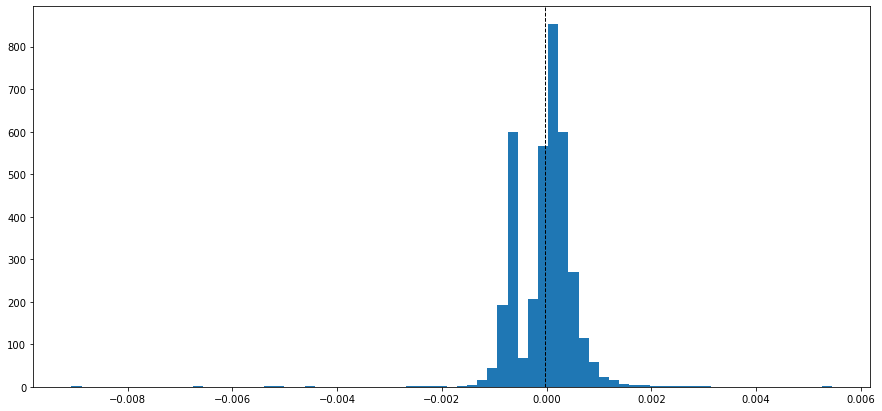

In [29]:
plt.figure(figsize=[15, 7])
plt.hist(tradeLog['trade_returns'], bins=75)
plt.axvline(tradeLog['trade_returns'].mean(), color='k', linestyle='dashed', linewidth=1)

In [30]:
tradeLog['trade_returns'].quantile(0.1)

-0.0007042930694954419

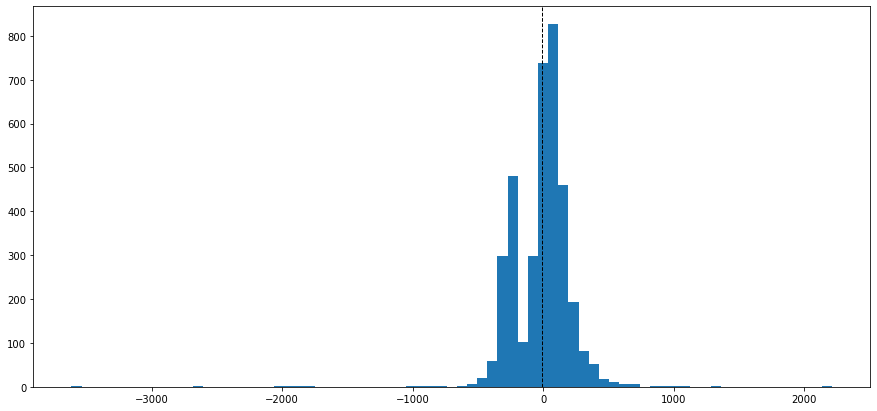

In [31]:
plt.figure(figsize=[15, 7])
plt.hist(tradeLog['trade_profit'], bins=75)
plt.axvline(tradeLog['trade_profit'].mean(), color='k', linestyle='dashed', linewidth=1)

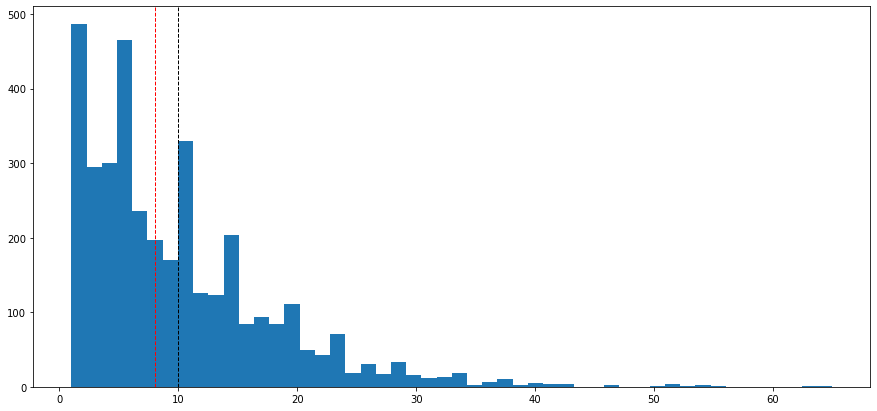

In [32]:
plt.figure(figsize=[15, 7])
plt.hist(tradeLog['holdingPeriod'], bins=50)
plt.axvline(tradeLog['holdingPeriod'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(tradeLog['holdingPeriod'].median(), color='r', linestyle='dashed', linewidth=1)

In [33]:
tradeLog.loc[tradeLog['trade_returns'] <= -0.0025]

,start,end,holdingPeriod,position,positionSizeY,entryY,exitY,positionSizeX,entryX,exitX,initialPortfolioValue,trade_profit,trade_returns
176,2019-01-18 14:01:00,2019-01-18 14:05:00,4,long,1000,165.454,163.6300,"[140.0, 185.0, 305.0, 96.0, 285.0, 176.0]","[88.69, 108.4, 200.19, 64.58, 185.05, 116.4]","[88.69, 108.3423, 200.17, 64.5845, 184.84, 116.5]",338407.8800,-1765.4075,-0.005217
1384,2019-05-16 13:40:00,2019-05-16 14:01:00,20,long,1000,185.300,183.0900,"[131.0, 170.0, 303.0, 104.0, 291.0, 174.0]","[97.93, 107.88, 253.36, 79.15, 224.13, 131.4]","[97.86, 107.76, 252.88, 78.985, 224.01, 131.35]",389553.5400,-1974.2100,-0.005068
1652,2019-06-12 13:14:00,2019-06-12 14:02:00,42,short,1000,182.400,183.4000,"[129.0, 170.0, 300.0, 104.0, 291.0, 171.0]","[106.07, 109.8108, 264.41, 82.91, 234.2353, 12...","[106.22, 109.0611, 264.455, 82.9835, 234.55, 1...",391483.3909,-1033.0999,-0.002639
1693,2019-06-18 11:15:00,2019-06-18 11:38:00,23,long,1000,187.390,183.7221,"[130.0, 171.0, 299.0, 104.0, 290.0, 172.0]","[107.89, 112.13, 269.582, 83.44, 232.09, 124.0]","[107.8575, 111.71, 269.96, 83.55, 231.92, 123.7]",398506.8080,-3615.4170,-0.009072
1780,2019-06-25 14:31:00,2019-06-25 14:34:00,3,short,1000,185.490,188.1075,"[130.0, 171.0, 298.0, 104.0, 290.0, 169.0]","[105.775, 112.93, 274.12, 84.24, 232.5, 125.84]","[105.73, 112.83, 274.0657, 84.1828, 232.65, 12...",397692.4600,-2674.8502,-0.006726
2139,2019-08-02 09:42:00,2019-08-02 09:43:00,1,long,1000,188.650,188.4000,"[132.0, 174.0, 292.0, 111.0, 283.0, 168.0]","[114.39, 121.49, 265.02, 95.35, 257.79, 113.43]","[114.51, 121.63, 270.993, 95.39, 257.8232, 113...",404869.2400,-2027.9916,-0.005009
3044,2019-10-28 13:59:00,2019-10-28 14:01:00,2,long,1000,197.450,195.6400,"[119.0, 168.0, 301.0, 131.0, 295.0, 157.0]","[96.42, 123.09, 267.83, 83.5069, 272.0508, 106...","[96.43, 123.21, 267.57, 83.51, 272.3026, 106.5...",418125.3999,-1850.3223,-0.004425
